# Random Forest


In [1]:
from src.image_OCT_2 import *
from sklearn.model_selection import cross_val_score
from src.image_Quantification_3 import *
import math 
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from src.preproc_functions import preprocessing_OCT

import warnings
warnings.filterwarnings("ignore")

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
%matplotlib inline


c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [2]:
filepathname_haze1=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
filepathname_haze2=os.path.join(dirname, 'Data','HAZE','haze 3.jpg')
filepathname_healthy1=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname_healthy2=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
filepathname_fuchs1=os.path.join(dirname, 'Data','Fuchs_2','VANLUD_OD_6_Line.jpg')
# filepathname_fuchs2=os.path.join(dirname, 'Data','Fuchs_2','FAIJEA_OS_1_Line.jpg')
filepathname_fuchs2=os.path.join(dirname, 'Data','Fuchs_2','SELNIC_OS_0_Line.jpg')

# filepathname=os.path.join(dirname, 'Data','Healthy','80608_REZAZK_OS.jpg')
test_ex=[filepathname_haze1,filepathname_haze2,filepathname_healthy1,filepathname_healthy2,filepathname_fuchs1,filepathname_fuchs2]
test_type=["haze1","haze2","healthy1","healthy2","fuchs1",'fuchs2']

In [188]:
# Compute or import dataset
move=True
useExpCorr=False
# folder="exp_correction/"
# append="_mov_win-exp_corr_"
append="_mov_win_"
folder=""
eliminate=30

try:
	data_healthy = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy"+append+".pkl")
except:
	repertory_healthy=os.path.join(dirname, 'Data','Healthy')
	healthy_value=1 #healthy
	data_healthy=create_new_dataset(repertory_healthy,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy.to_pickle("./Dataset/data_set_Q3_healthy"+append+".pkl")
 
try:
	data_healthy_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy_2"+append+".pkl")
except:
	repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
	healthy_value=1 #healthy
	data_healthy_2=create_new_dataset(repertory_healthy_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy_2.to_pickle("./Dataset/data_set_Q3_healthy_2"+append+".pkl")
try:
	data_haze = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze"+append+".pkl")
except:
	repertory_haze=os.path.join(dirname, 'Data','HAZE')
	healthy_value=0 #patho
	data_haze=create_new_dataset(repertory_haze,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_haze.to_pickle("./Dataset/data_set_Q3_haze"+append+".pkl")

try:
	data_haze_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze_2"+append+".pkl")
except:
	repertory_haze_2=os.path.join(dirname, 'Data','HAZE_2')
	healthy_value=0 #patho
	data_haze_2=create_new_dataset(repertory_haze_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_haze_2.to_pickle("./Dataset/data_set_Q3_haze_2"+append+".pkl")

try:
	data_fuchs = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs"+append+".pkl")
except:
	repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_2')
	healthy_value=2 #fushs
	data_fuchs=create_new_dataset(repertory_fuchs,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_fuchs.to_pickle("./Dataset/data_set_Q3_fuchs"+append+".pkl")

try:
	data_fuchs_rep = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs_rep"+append+".pkl") 
except:
	repertory_fuchs_rep=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
	healthy_value=2 #fushs
	data_fuchs_rep=create_new_dataset(repertory_fuchs_rep,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep"+append+".pkl")
 
try:
	data_healthy_rep = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy_rep"+append+".pkl") 
except:
	repertory_healthy_rep=os.path.join(dirname, 'Data','repetabilite_Healthy')
	healthy_value=1 #Healthy
	data_healthy_rep=create_new_dataset(repertory_healthy_rep,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy_rep.to_pickle("./Dataset/data_set_Q3_healthy_rep"+append+".pkl")

print("Succesfully imported")

Succesfully imported


In [4]:
# selection = ['Sigma', 'Mean', 'Beta','IntensityPeak'] #, 'MSE','AreaRatio', #'PeakWidth', 'Sigma', 'DataCov', 'Mean', 'MSE', 'AreaRatio', 'Alpha','Beta', 'IntensityPeak', 'Healthy', 'Origin'
# selection = ['Sigma', 'Mean', 'Beta','IntensityPeak','MSE','AreaRatio']
selection = ['PeakWidth', 'Sigma', 'DataCov', 'Mean', 'MSE', 'AreaRatio', 'Alpha','Beta', 'IntensityPeak']
# selct=False
# if selct:
nb_param=len(selection)
data_healthy_2=data_healthy_2.filter(selection+list(data_fuchs.columns[9:]),axis=1)
data_haze_2=data_haze_2.filter(selection+list(data_fuchs.columns[9:]),axis=1)
data_fuchs=data_fuchs.filter(selection+list(data_fuchs.columns[9:]),axis=1)
# selection=['Sigma', 'Mean', 'MSE','AreaRatio', 'Beta','IntensityPeak']
# else:
#     nb_param=

In [189]:
# Create learning DataSet
n=data_healthy_2.shape[0]
list_id=np.random.randint(0,data_healthy_2.shape[0],n)
df=data_fuchs.iloc[list_id]


data=pd.concat([data_healthy_2,df],ignore_index=True)
data_save=data
# data=pd.concat([data_healthy_2,data_fuchs])
# data=data_healthy
# data=pd.concat([data_healthy,data_haze])
# data
data_copy=data.drop(["Healthy","Origin"],axis=1)
# data_copy=pd.DataFrame(np.real(data_copy))
# data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

new_data=data_copy
new_data["Healthy"]=data["Healthy"]
from sklearn.model_selection import train_test_split
train, test = train_test_split(new_data, test_size=0.2)

ytrain=train["Healthy"]
Xtrain=train.drop(["Healthy"],axis=1)

ytest=test["Healthy"]
Xtest=test.drop(["Healthy"],axis=1)

print("Total number of data:{:.0f} splited in train:{:.0f} and test:{:.0f}".format(len(data),len(ytrain),len(ytest)))
print("		Number of healthy in   dataset:{:.0f} ({:.0f}%) train:{:.0f} ({:.0f}%) test:{:.0f} ({:.0f}%)".format(np.sum(data["Healthy"]==1),(np.sum(data["Healthy"]==1)/len(data["Healthy"]==1)*100),np.sum(ytrain==1),(np.sum(ytrain==1)/len(ytrain)*100),np.sum(ytest==1),(np.sum(ytest==1)/len(ytest)*100)))
print("		Number of haze    in   dataset:{:.0f} ({:.0f}%) train:{:.0f} ({:.0f}%) test:{:.0f} ({:.0f}%)".format(np.sum(data["Healthy"]==0),(np.sum(data["Healthy"]==0)/len(data["Healthy"]==0)*100),np.sum(ytrain==0),(np.sum(ytrain==0)/len(ytrain)*100),np.sum(ytest==0),(np.sum(ytest==0)/len(ytest)*100)))
print("		Number of fuchs   in   dataset:{:.0f} ({:.0f}%) train:{:.0f} ({:.0f}%) test:{:.0f} ({:.0f}%)".format(np.sum(data["Healthy"]==2),(np.sum(data["Healthy"]==2)/len(data["Healthy"]==2)*100),np.sum(ytrain==2),(np.sum(ytrain==2)/len(ytrain)*100),np.sum(ytest==2),(np.sum(ytest==2)/len(ytest)*100)))
# ytrain=(ytrain==1)*1
# ytest=(ytest==1)*1
# ytest["Healthy"]=(ytest["Healthy"]==1)*1
# new_data["Healthy"]=data["Healthy"]

Total number of data:326 splited in train:260 and test:66
		Number of healthy in   dataset:163 (50%) train:128 (49%) test:35 (53%)
		Number of haze    in   dataset:0 (0%) train:0 (0%) test:0 (0%)
		Number of fuchs   in   dataset:163 (50%) train:132 (51%) test:31 (47%)


In [190]:
ytrain[ytrain==1]=0 #Healthy
ytrain[ytrain==2]=1 #Fuchs

ytest[ytest==1]=0 #Healthy
ytest[ytest==2]=1 #Fuchs

# ytrain[ytrain==1]=1 #Healthy
# ytrain[ytrain==2]=0 #Fuchs

# ytest[ytest==1]=1 #Healthy
# ytest[ytest==2]=0 #Fuchs

## Training model - Looking for the best parameters

### Max sample

>0.1 0.929 (0.037)
>0.2 0.928 (0.039)
>0.3 0.931 (0.035)
>0.4 0.936 (0.029)
>0.5 0.936 (0.029)
>0.6 0.940 (0.028)
>0.7 0.941 (0.031)
>0.8 0.940 (0.028)
>0.9 0.937 (0.029)
>1.0 0.940 (0.026)


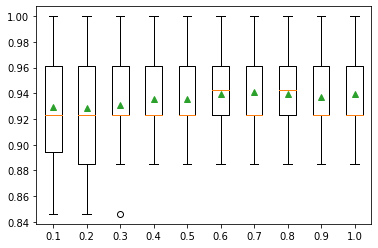

In [7]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, Xtrain, ytrain)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Max features

>1 0.936 (0.033)
>2 0.938 (0.027)
>3 0.940 (0.029)
>4 0.935 (0.032)
>5 0.935 (0.035)
>6 0.926 (0.040)
>7 0.928 (0.035)


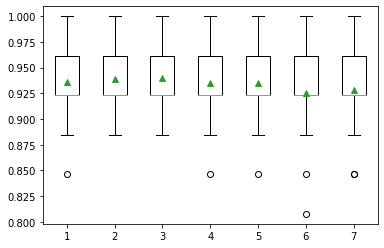

In [8]:

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, Xtrain, ytrain)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Nb of trees

>10 0.938 (0.037)
>50 0.941 (0.034)
>100 0.941 (0.029)
>500 0.940 (0.028)
>1000 0.938 (0.027)


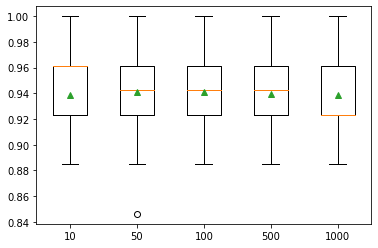

In [9]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, Xtrain, ytrain)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Tree depth

>1 0.924 (0.040)
>2 0.927 (0.035)
>3 0.941 (0.029)
>4 0.940 (0.029)
>5 0.940 (0.028)
>6 0.941 (0.029)
>7 0.938 (0.027)
>None 0.941 (0.029)


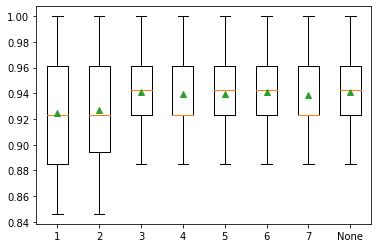

In [10]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, Xtrain, ytrain)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Final train

In [148]:
clf =RandomForestClassifier(n_estimators=100,max_depth=None,max_features=3,max_samples=0.9)
clf.fit(Xtrain,ytrain)
pred_train = clf.predict(Xtrain)
score = np.sum(pred_train==ytrain)/len(pred_train)
print(score)

1.0


## Cross Validation

In [191]:
scores = cross_val_score(estimator=clf, X=Xtrain, y=ytrain, cv=10, scoring='accuracy')
print("Averaged accuracy: {:.1f}%".format(100*np.mean(scores)))
print(scores)

Averaged accuracy: 93.1%
[0.96153846 0.92307692 0.88461538 0.92307692 0.92307692 0.92307692
 0.92307692 0.88461538 1.         0.96153846]


## Validation: 

In [192]:
pred = clf.predict(Xtest)
score = np.sum(pred==ytest)/len(pred)
print(score)

0.9696969696969697


In [126]:
def to_image(healthy_value,name,flat=True):
    if healthy_value==2:
        path=os.path.join(dirname, 'Data','Fuchs_2')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==1:
        path=os.path.join(dirname, 'Data','Healthy_2')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==-1:
        path=os.path.join(dirname, 'Data','Healthy')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==0:
        path=os.path.join(dirname, 'Data','HAZE_2')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    elif healthy_value==-3:
        path=os.path.join(dirname, 'Data','HAZE')
        im=image_OCT(path,name+'.jpg')
        im.AutoTreatment()
    if flat:    
        return(im.OCT_flat) #im.OCT_brut
    else:
        return(im.OCT_brut) #im.OCT_brut

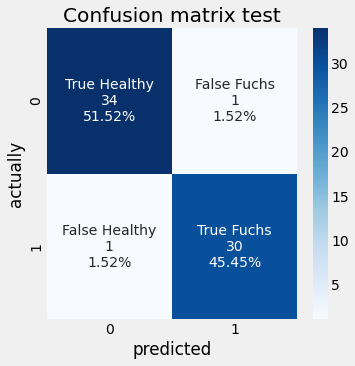

Accuracy test: 97.0%


Text(0.5, 0, 'Relative Importance')

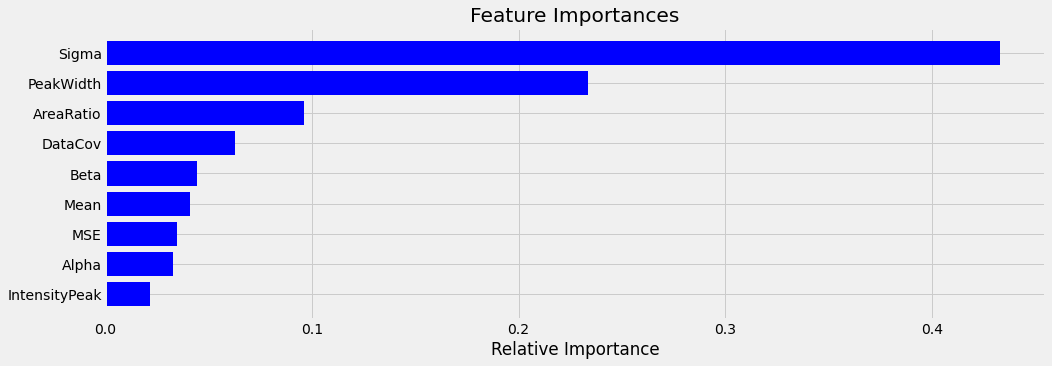

In [193]:
cf_matrix=confusion_matrix(ytest, pred)

group_names = ['True Healthy','False Fuchs','False Healthy','True Fuchs']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(5,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title("Confusion matrix test")
plt.xlabel("predicted")
plt.ylabel("actually")
plt.show()
print("Accuracy test: {:.1f}%".format(accuracy_score(ytest, pred)*100))


importances = clf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data_copy.columns[i] for i in indices])
plt.xlabel('Relative Importance')

In [198]:
import pickle
Pkl_Filename = "RF_Model.pkl"  
# if True:
if False:
    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump([clf,data_save,Xtrain,ytrain,Xtest,ytest], file)


In [129]:
missmatch=np.where(ytest!=clf.predict(Xtest))
missmatch_loc=Xtest.index[missmatch]
missclass=data.loc[missmatch_loc]
predicted=clf.predict(Xtest)[missmatch]
actually=(ytest.loc[missmatch_loc]).to_numpy()

In [130]:
clf.predict_proba(Xtest)[missmatch]

array([[0.54, 0.46]])

In [131]:
name

'QDA'

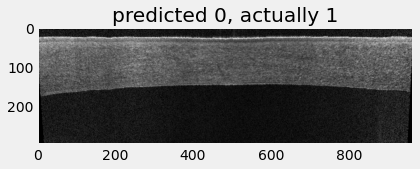

In [132]:
for i,name in enumerate(data.loc[missmatch_loc]["Origin"]):
    plt.figure()
    plt.imshow(to_image(data.loc[missmatch_loc[i]]["Healthy"],name,flat=True)[0:300,:],cmap='gray')
    plt.title("predicted "+str(predicted[i])+", actually "+str(actually[i]))
    plt.grid(b=None)
    

## What about injecting haze ?

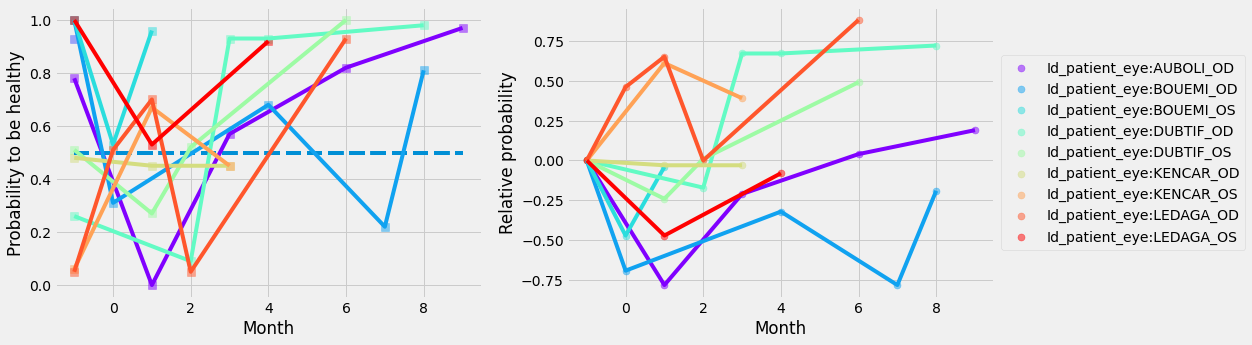

In [194]:
if 'Month' not in data_haze_2.columns:
	origin=data_haze_2["Origin"]
	n=len(origin)
	month=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		if text[-1]=="normal":
			month.append(-1)
		else:
			month.append(int(text[-1][1:]))
		id_patient.append(text[0])
		eye.append(text[1])
		id_patient_eye.append(text[0]+"_"+text[1])

	data_haze_2["Month"]=month
	data_haze_2["Id_patient"]=id_patient
	data_haze_2["Id_patient_eye"]=id_patient_eye
	data_haze_2["Eye"]=eye

data=data_haze_2
data_copy=data.drop(data.columns[nb_param:],axis=1)
# data_copy=pd.DataFrame(np.real(data_copy))
# data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

new_data=data_copy
new_data["Healthy"]=data["Healthy"]

y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)

y_pred = clf.predict(X)
proba = clf.predict_proba(X)

data["Proba"]=proba.T[0]

from matplotlib import cm
alpha=0.5
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data["Id_patient_eye"]))))
plt.figure(figsize=(15,5))
# plt.plot(data["Month"],data["Proba"])
plt.subplot(1,2,1)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
	filter=data["Id_patient_eye"]==m
	plt.scatter(data["Month"][filter],data["Proba"][filter],marker='s',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
	plt.plot(data["Month"][filter],data["Proba"][filter],color=colors[i])
	plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
	plt.xlabel("Month")
	plt.ylabel("Probability to be healthy")
# plt.legend()
plt.subplot(1,2,2)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
	filter=data["Id_patient_eye"]==m
	if np.sum(filter)>1:
		# print(data["Proba"][filter],'\n')
		plt.scatter(data["Month"][filter],data["Proba"][filter]-np.array(data["Proba"][filter])[0],marker='o',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
		plt.plot(data["Month"][filter],data["Proba"][filter]-np.array(data["Proba"][filter])[0],color=colors[i])
		plt.xlabel("Month")
		plt.ylabel("Relative probability")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


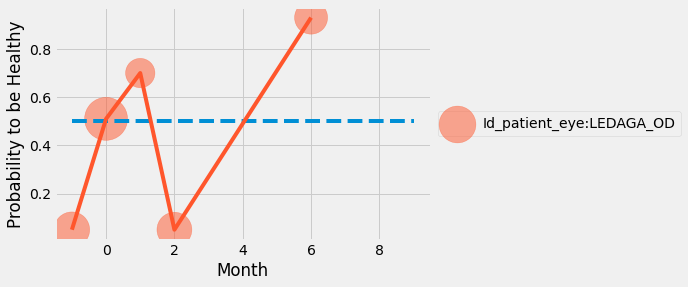

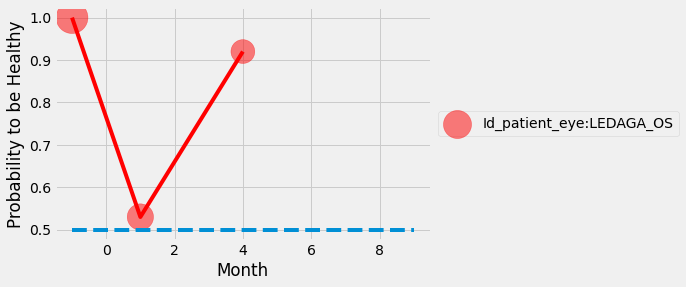

In [153]:
minSNR=18
maxSNR=23
filter=data["Month"]==-1
sub_data=data.filter(["Origin","Id_patient_eye","Proba"])[filter]
tho=0.5


filter_healthy=sub_data["Proba"]<=tho
sub_data_healthy=sub_data[filter_healthy]
fig,ax=plt.subplots(1,sub_data_healthy.shape[0],figsize=(30,5))
for i in range(sub_data_healthy.shape[0]):
    patient=sub_data_healthy.iloc[i]
    ax[i].imshow(to_image(0,patient["Origin"],flat=True) ,cmap='gray')
    ax[i].set_title(patient["Origin"])
    ax[i].grid(False)
    # print(patient["Proba"])
fig.suptitle("Proba<{:.1}".format(tho))
fig.show()

plt.figure(figsize=(15,5))
# plt.plot(data["Month"],data["Proba"])
# plt.subplot(1,2,1)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
    if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
        filter=data["Id_patient_eye"]==m
        sub_data_loop=data[filter]
        snrs=[]
        snr=[]
        for row in sub_data_loop["Origin"]:
            filepathname=os.path.join(dirname, 'Data','HAZE_2')
            im=image_OCT(filepathname,row+'.jpg')
            im.AutoTreatment()
            snrs.append("{:.2f}".format(im.ImageSNR()))
            snr.append(im.ImageSNR())
        # print(snrs)
        s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
        plt.scatter(data["Month"][filter],data["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
        plt.plot(data["Month"][filter],data["Proba"][filter],color=colors[i])
        plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
        plt.xlabel("Month")
        plt.ylabel("Probability to be Healthy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

filter_healthy=sub_data["Proba"]>tho
sub_data_healthy=sub_data[filter_healthy]
fig,ax=plt.subplots(1,sub_data_healthy.shape[0],figsize=(30,5))
for i in range(sub_data_healthy.shape[0]):
    patient=sub_data_healthy.iloc[i]
    ax[i].imshow(to_image(0,patient["Origin"],flat=True) ,cmap='gray')
    ax[i].set_title(patient["Origin"])
    ax[i].grid(False)
    # print(patient["Proba"])
fig.suptitle("Proba>{:.1}".format(tho))

plt.figure(figsize=(15,5))
# plt.plot(data["Month"],data["Proba"])
# plt.subplot(1,2,1)
for i,m in enumerate(np.unique(data["Id_patient_eye"])):
    if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
        filter=data["Id_patient_eye"]==m
        sub_data_loop=data[filter]
        snrs=[]
        snr=[]
        for row in sub_data_loop["Origin"]:
            filepathname=os.path.join(dirname, 'Data','HAZE_2')
            im=image_OCT(filepathname,row+'.jpg')
            im.AutoTreatment()
            snrs.append("{:.2f}".format(im.ImageSNR()))
            snr.append(im.ImageSNR())
        # print(snrs)
        s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
        plt.scatter(data["Month"][filter],data["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
        plt.plot(data["Month"][filter],data["Proba"][filter],color=colors[i])
        plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
        plt.xlabel("Month")
        plt.ylabel("Probability to be Healthy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Analysis of evolution 

0

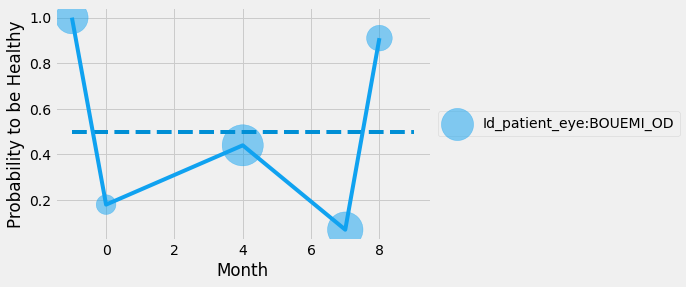

In [135]:
id_patient_selected="BOUEMI_OD"
# id_patient_selected="BOUEMI_OS"
# id_patient_selected="LEDAGA_OS"
# id_patient_selected="AUBOLI_OD"
# id_patient_selected="DUBTIF_OD"

data=data_haze_2
filter=data["Month"]==-1
sub_data_healthy=data.filter(["Origin","Id_patient_eye","Proba"])[filter]

def display_patient(id_patient_selected,data,sub_data_healthy):
    for i,m in enumerate(np.unique(data["Id_patient_eye"])):
        if m==id_patient_selected:
            # print(m==sub_data_healthy["Id_patient_eye"])
            if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
                filter_=data["Id_patient_eye"]==m
                sub_data_loop=data[filter_]
                fig,ax=plt.subplots(2,len(sub_data_loop["Origin"]),figsize=(5*len(sub_data_loop["Origin"]),10))
                j=0
                for row in sub_data_loop["Origin"]:
                    filepathname=os.path.join(dirname, 'Data','HAZE_2')
                    im=image_OCT(filepathname,row+'.jpg')
                    im.AutoTreatment()
                    # snrs.append("{:.2f}".format(im.ImageSNR()))
                    snr=im.ImageSNR()
                    ascan=im.OCT_flat[:,10]
                    ascan=1*(ascan>0.50*np.max(ascan))*ascan
                    # print(data["Proba"][filter_].iloc[0])
                    pb=data["Proba"][filter_].iloc[j]
                    # print(pb,snr)
                    peak0=argrelextrema(ascan, np.greater)[0][0]
                    # peak0=20
                    ax[0][j].imshow(im.OCT_flat[np.max([peak0-20,0]):np.max([peak0-20,0])+200,::2],cmap="gray") #200:600
                    ax[1][j].imshow(im.OCT,cmap="gray")
                    ax[0][j].grid(False)
                    ax[1][j].grid(False)
                    ax[0][j].set_title("M="+str(data["Month"][filter_].iloc[j])+", P={:.3f}, SNR={:.1f}".format(pb,snr))
                    j+=1
    # plt.plot(data["Month"],data["Proba"])
    # plt.subplot(1,2,1)
    for i,m in enumerate(np.unique(data["Id_patient_eye"])):
        if m==id_patient_selected:
            plt.figure(figsize=(15,5))
            if np.sum(m==sub_data_healthy["Id_patient_eye"])>0:
                filter_=data["Id_patient_eye"]==m
                sub_data_loop=data[filter_]
                snrs=[]
                snr=[]
                for row in sub_data_loop["Origin"]:
                    filepathname=os.path.join(dirname, 'Data','HAZE_2')
                    im=image_OCT(filepathname,row+'.jpg')
                    im.AutoTreatment()
                    snrs.append("{:.2f}".format(im.ImageSNR()))
                    snr.append(im.ImageSNR())
                # print(snrs)
                s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
                plt.scatter(data["Month"][filter_],data["Proba"][filter_],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
                plt.plot(data["Month"][filter_],data["Proba"][filter_],color=colors[i])
                plt.hlines(y=0.5,xmin=-1,xmax=9,linestyles="--")
                plt.xlabel("Month")
                plt.ylabel("Probability to be Healthy")
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return(0)
    
display_patient(id_patient_selected,data,sub_data_healthy)

## On old dataset

6    80608_REZAZK_OD
Name: Origin, dtype: object
Series([], Name: Origin, dtype: object)


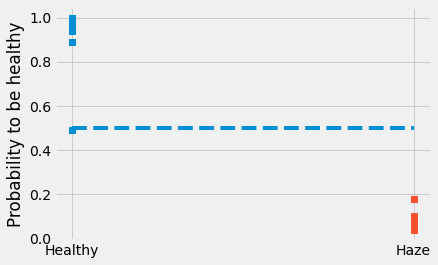

In [195]:
data=data_healthy
data_copy=data.drop(data.columns[nb_param:],axis=1)
new_data=data_copy
new_data["Healthy"]=data["Healthy"]
y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)
y_pred = clf.predict(X)
proba = clf.predict_proba(X)
data["Proba"]=proba.T[0]

healthy=data["Proba"]
print(data["Origin"][data["Proba"]<0.5])

data=data_haze
data_copy=data.drop(data.columns[nb_param:],axis=1)
new_data=data_copy
new_data["Healthy"]=data["Healthy"]
y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)
y_pred = clf.predict(X)
proba = clf.predict_proba(X)
data["Proba"]=proba.T[0]
print(data["Origin"][data["Proba"]>0.5])

haze=data["Proba"]
plt.plot(["Healthy"]*len(healthy),healthy,'s')
plt.plot(["Haze"]*len(haze),haze,'s')
plt.ylabel("Probability to be healthy")
plt.hlines(y=0.5,xmin='Healthy',xmax="Haze",linestyles='--')

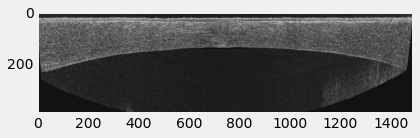

In [137]:
plt.imshow(to_image(-3,"haze 2",flat=True)[0:400,:],cmap='gray')
plt.grid(b=None)

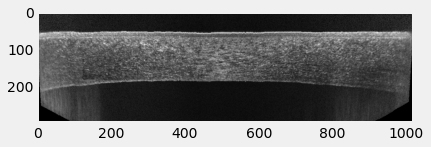

In [138]:
plt.imshow(to_image(-1,"80608_REZAZK_OD",flat=True)[100:400,:],cmap='gray')
plt.grid(b=None)

## Repetability

In [139]:
data_healthy_rep.head()

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Alpha,Beta,IntensityPeak,Healthy,Origin
0,32.582559,8.658094,0.006767,59.746070,0.059130,0.029413,0.781160,0.155968,0.460457,1,BEAJUL_0
1,29.914274,7.304106,0.008299,61.577034,0.056728,0.027020,0.792633,0.147240,0.506114,1,BEAJUL_1
2,28.117197,7.247862,0.006573,61.702906,0.049767,0.025263,0.814536,0.181773,0.471003,1,BEAJUL_2
3,27.208969,7.189367,0.005414,62.981969,0.040783,0.024635,0.817434,0.182407,0.413124,1,BEAJUL_3
4,32.297823,8.017749,0.006691,62.687755,0.049091,0.027771,0.804007,0.188055,0.419280,1,BEAJUL_4


In [140]:
data_fuchs_rep.head()

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Alpha,Beta,IntensityPeak,Healthy,Origin
0,65.401854,20.579807,0.015617,63.368285,0.141398,0.108492,0.305067,0.210006,0.634476,2,COUMAR_FuchsDMEK_OD_Line_0
1,68.822955,20.825870,0.016633,67.202242,0.155544,0.114064,0.743996,0.220390,0.646674,2,COUMAR_FuchsDMEK_OD_Line_1
2,71.934725,21.517529,0.018094,64.199060,0.163619,0.128054,0.835617,0.199261,0.651947,2,COUMAR_FuchsDMEK_OD_Line_2
3,73.311336,24.300207,0.022652,63.052703,0.166219,0.108018,0.831187,0.175641,0.675540,2,COUMAR_FuchsDMEK_OD_Line_3
4,75.744628,24.047104,0.016140,68.829235,0.193445,0.133394,0.810705,0.178407,0.597936,2,COUMAR_FuchsDMEK_OD_Line_4


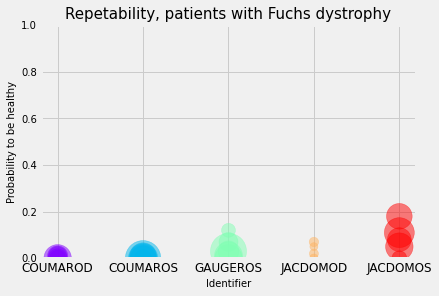

In [196]:
X_rep=data_fuchs_rep.drop(["Healthy","Origin"],axis=1)
y_rep=data_fuchs_rep["Healthy"]
data_rep=data_fuchs_rep.copy()
y_pred = clf.predict(X_rep)
proba = clf.predict_proba(X_rep)

data_rep["Proba"]=proba.T[0]

if 'Id_patient_eye' not in data_rep.columns:
	origin=data_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0]+text[2])
		eye.append(text[2])

	data_rep["Repetition"]=repetition
	data_rep["Id_patient"]=id_patient
	data_rep["Id_patient_eye"]=id_patient_eye
	data_rep["Eye"]=eye
	# data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep.pkl")
 
minSNR=18
maxSNR=23

labels_rep=[]
values_rep=[]
colors_rep=[]
size_dot_rep=[]
plt.figure(figsize=(20,5))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_rep["Id_patient_eye"]))))
for i,m in enumerate(np.unique(data_rep["Id_patient_eye"])):
	filter=data_rep["Id_patient_eye"]==m
	sub_data=data_rep[filter]
	snrs=[]
	snr=[]
	for row in sub_data["Origin"]:
		filepathname=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
		im=image_OCT(filepathname,row+'.jpg')
		im.AutoTreatment()
		snrs.append("{:.2f}".format(im.ImageSNR()))
		snr.append(im.ImageSNR())
	# print(snrs)
	s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
	values_rep+=list(data_rep["Proba"][filter])
	labels_rep+=list(data_rep["Id_patient_eye"][filter])
	colors_rep+=[colors[i]]*len(list(data_rep["Proba"][filter]))
	size_dot_rep+=s
	# plt.scatter(data_rep["Id_patient_eye"][filter],data_rep["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
	
	# plt.xlabel("Sigma")
	# plt.ylabel("Mean")
plt.scatter(labels_rep,values_rep,marker='o',color=colors_rep,s=size_dot_rep,label="Id_patient_eye:"+str(m),alpha=alpha)
plt.ylim([0.0,1])
# plt.legend()
plt.title("Repetability, patients with Fuchs dystrophy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel("Identifier", fontsize=10)
plt.ylabel("Probability to be healthy", fontsize=10)
plt.show()


Error with:  c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\repetabilite_Healthy ITZMAR_0.jpg
Error with:  c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\repetabilite_Healthy ITZMAR_3.jpg


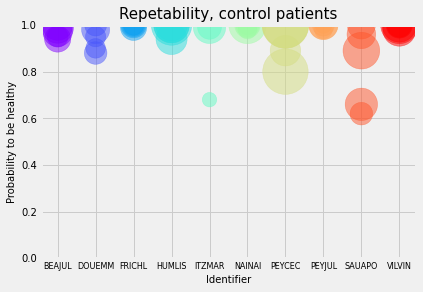

In [197]:
X_rep=data_healthy_rep.drop(["Healthy","Origin"],axis=1)
y_rep=data_healthy_rep["Healthy"]
data_rep=data_healthy_rep.copy()
y_pred = clf.predict(X_rep)
proba = clf.predict_proba(X_rep)

data_rep["Proba"]=proba.T[0]

if 'Id_patient_eye' not in data_rep.columns:
	origin=data_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0])

	data_rep["Repetition"]=repetition
	data_rep["Id_patient"]=id_patient
	data_rep["Id_patient_eye"]=id_patient_eye
	# data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep.pkl")
 
minSNR=18
maxSNR=23

labels_rep=[]
values_rep=[]
colors_rep=[]
size_dot_rep=[]
plt.figure(figsize=(40,5))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_rep["Id_patient_eye"]))))
bool_list=[]
for i,m in enumerate(np.unique(data_rep["Id_patient_eye"])):
	filter=data_rep["Id_patient_eye"]==m
	sub_data=data_rep[filter]
	snrs=[]
	snr=[]
	for row in sub_data["Origin"]:
		filepathname=os.path.join(dirname, 'Data','repetabilite_Healthy')
		try:
			im=image_OCT(filepathname,row+'.jpg')
			im.AutoTreatment()
			snrs.append("{:.2f}".format(im.ImageSNR()))
			snr.append(im.ImageSNR())
			bool_list.append(True)
		except:
			print("Error with: ",filepathname,row+'.jpg')
			bool_list.append(False)
	# print(snrs)
	s=[ 50+int(1000*(1-(n-minSNR)/(maxSNR-minSNR))**2 ) for n in snr]
	values_rep+=list(data_rep["Proba"][filter])
	labels_rep+=list(data_rep["Id_patient_eye"][filter])
	colors_rep+=[colors[i]]*len(list(data_rep["Proba"][filter]))
	size_dot_rep+=s
	# plt.scatter(data_rep["Id_patient_eye"][filter],data_rep["Proba"][filter],marker='o',color=colors[i],s=s,label="Id_patient_eye:"+str(m),alpha=alpha)
	
	# plt.xlabel("Sigma")
	# plt.ylabel("Mean")
bool_array=np.array(bool_list)
plt.scatter(np.array(labels_rep)[bool_array],np.array(values_rep)[bool_array],marker='o',color=np.array(colors_rep)[bool_array],s=size_dot_rep,label="Id_patient_eye:"+str(m),alpha=alpha)
plt.ylim([0.0,1])
# plt.legend()
# plt.title("Repetability Q3 move:"+str(move)+" expcorr:"+str(useExpCorr), fontsize=15)
plt.title("Repetability, control patients", fontsize=15)
plt.xticks(fontsize=8)
plt.xlabel("Identifier", fontsize=10)
plt.ylabel("Probability to be healthy", fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Other classifiers 

In [143]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(Xtrain, ytrain)
    score = clf.score(Xtest, ytest)
    scores = cross_val_score(estimator=clf, X=Xtrain, y=ytrain, cv=10, scoring='accuracy')
    print(name,'\n      test validation: ',score*100,'%\n      train (averaged) cross validation: {:.2f}%'.format(np.mean(scores)*100))

Nearest Neighbors 
      test validation:  100.0 %
      train (averaged) cross validation: 91.15%
Linear SVM 
      test validation:  92.42424242424242 %
      train (averaged) cross validation: 92.69%
RBF SVM 
      test validation:  72.72727272727273 %
      train (averaged) cross validation: 81.92%
Gaussian Process 
      test validation:  95.45454545454545 %
      train (averaged) cross validation: 90.77%
Decision Tree 
      test validation:  95.45454545454545 %
      train (averaged) cross validation: 92.31%
Random Forest 
      test validation:  95.45454545454545 %
      train (averaged) cross validation: 91.92%
Neural Net 
      test validation:  92.42424242424242 %
      train (averaged) cross validation: 91.15%
AdaBoost 
      test validation:  93.93939393939394 %
      train (averaged) cross validation: 91.92%
Naive Bayes 
      test validation:  89.39393939393939 %
      train (averaged) cross validation: 84.62%
QDA 
      test validation:  93.93939393939394 %
      train 

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf=LogisticRegression()
clf.fit(Xtrain,ytrain)
print("Train accuracy:",metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
y_pred=clf.predict(Xtest)
print("Test accuracy:",metrics.accuracy_score(ytest, y_pred))

Train accuracy: 0.9153846153846154
Test accuracy: 0.9393939393939394


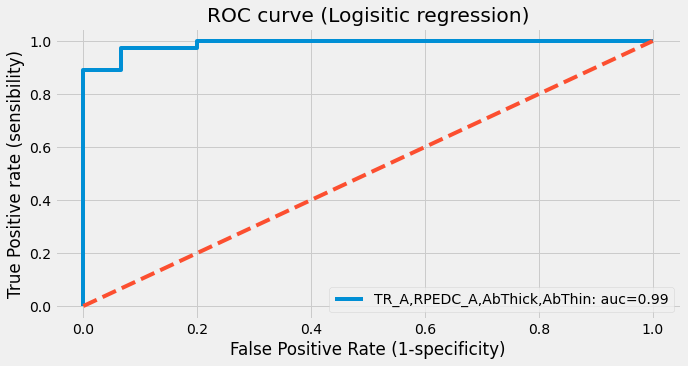

In [145]:
y_pred_proba = clf.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,label="TR_A,RPEDC_A,AbThick,AbThin: auc={:.2f}".format(auc))
plt.plot(fpr,fpr,"--")
plt.legend(loc=4)
plt.title("ROC curve (Logisitic regression)")
plt.xlabel("False Positive Rate (1-specificity)")
plt.ylabel("True Positive rate (sensibility)")
plt.show()